In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [41]:
df= pd.read_csv("/kaggle/input/languagedata/Language Detection.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [42]:
df.shape

(10337, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [44]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [45]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


There are 66 duplicate rows, droping them

In [46]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [47]:
df.shape

(10271, 2)

In [48]:
df["Language"].nunique()

17

The dataset contains texts from 17 different languages

In [49]:
#How many rows belong to each language?
df["Language"].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

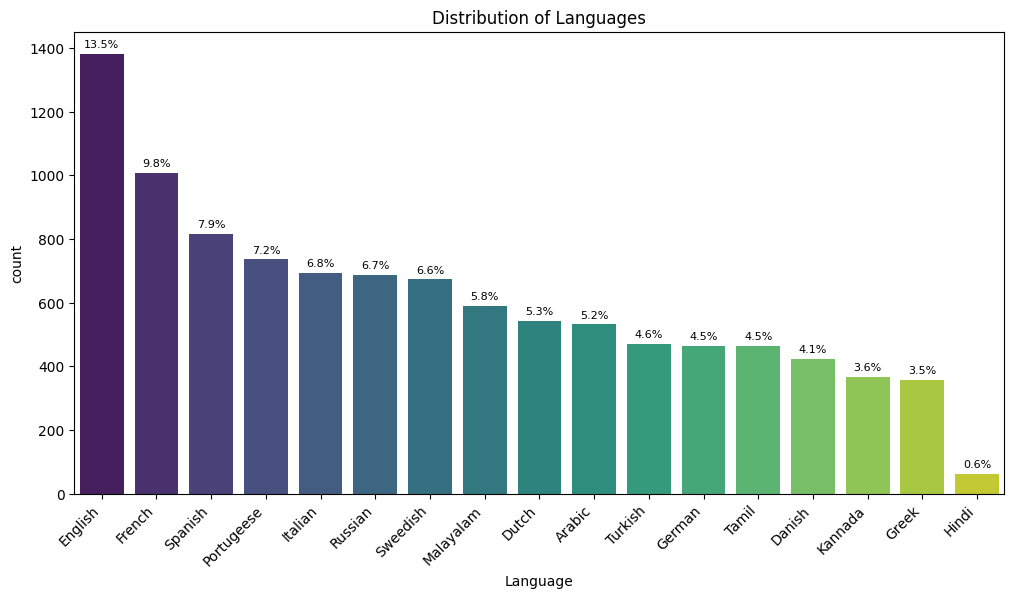

In [50]:
# Count plot with percentage annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=df, palette='viridis', order=df['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

# Add percentage annotations
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

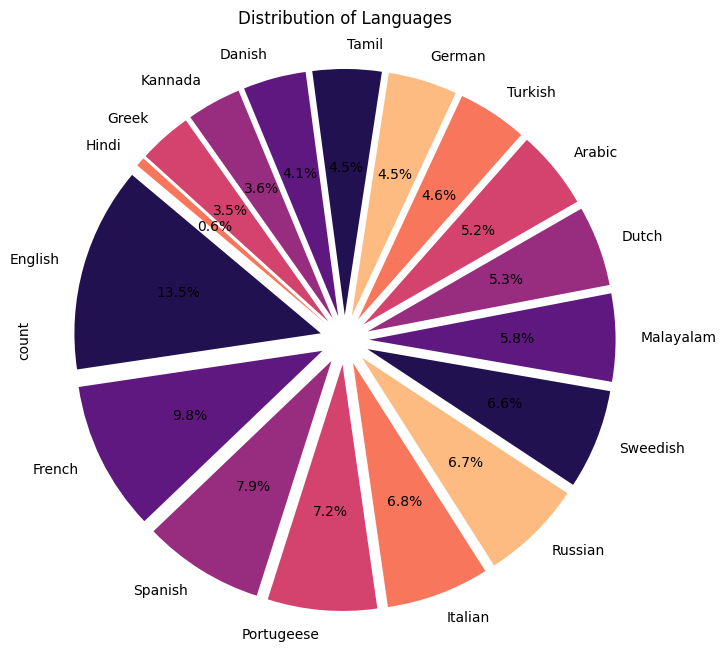

In [51]:
# Pie plot
plt.figure(figsize=(8, 8))
df['Language'].value_counts().loc[df['Language'].value_counts().index].plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma'), explode=[0.1] * len(df['Language'].unique()))
plt.title('Distribution of Languages')
plt.show()

In [52]:
data= df.copy()
data['Cleaned_Text']= ""
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [53]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [54]:
data['Cleaned_Text'] = data['Text'].apply(lambda x: clean_function(x))
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [55]:
X= data["Cleaned_Text"]
y= data["Language"]

In [56]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= encoder.fit_transform(y)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [58]:
# Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Model: Logistic Regression
Accuracy: 0.9513239875389408
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       146
           1       0.95      0.91      0.93       103
           2       0.99      0.90      0.94       133
           3       0.97      0.99      0.98       361
           4       1.00      0.95      0.98       255
           5       1.00      0.95      0.97       114
           6       1.00      0.95      0.97        79
           7       1.00      0.75      0.86        12
           8       0.99      0.92      0.95       159
           9       1.00      0.95      0.98        86
          10       1.00      0.99      1.00       161
          11       0.99      0.94      0.97       178
          12       0.63      1.00      0.77       150
          13       0.94      0.98      0.96       205
          14       0.98      0.93      0.96       182
          15       1.00      0.96      0.98       111
  

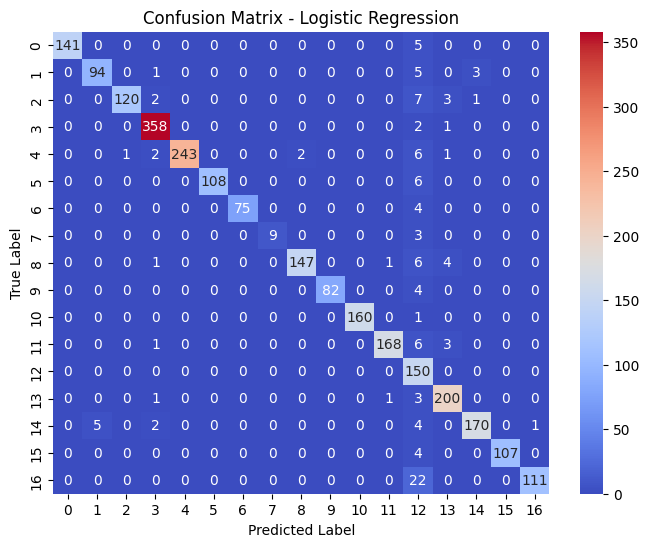



Model: K-Nearest Neighbors
Accuracy: 0.4205607476635514
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       146
           1       0.83      0.44      0.57       103
           2       0.98      0.47      0.63       133
           3       0.86      0.17      0.28       361
           4       0.52      0.28      0.37       255
           5       0.94      0.43      0.59       114
           6       1.00      0.58      0.74        79
           7       1.00      0.33      0.50        12
           8       0.88      0.18      0.30       159
           9       1.00      0.55      0.71        86
          10       1.00      0.58      0.74       161
          11       0.93      0.14      0.24       178
          12       1.00      0.53      0.69       150
          13       0.12      0.96      0.22       205
          14       0.98      0.24      0.38       182
          15       1.00      0.63      0.77       111


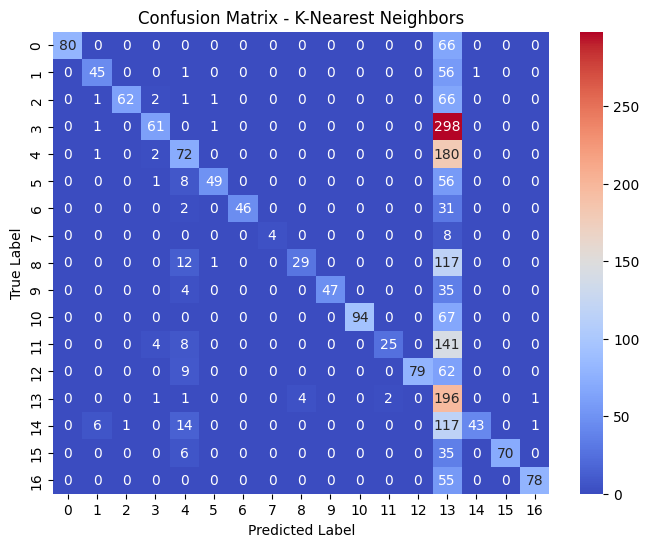



Model: Random Forest
Accuracy: 0.9345794392523364
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       146
           1       0.95      0.91      0.93       103
           2       0.97      0.90      0.93       133
           3       0.98      0.97      0.97       361
           4       0.97      0.92      0.95       255
           5       0.96      0.91      0.94       114
           6       1.00      0.95      0.97        79
           7       1.00      0.92      0.96        12
           8       0.98      0.91      0.94       159
           9       1.00      0.94      0.97        86
          10       1.00      0.95      0.97       161
          11       0.96      0.92      0.94       178
          12       0.59      1.00      0.74       150
          13       0.91      0.93      0.92       205
          14       0.96      0.94      0.95       182
          15       1.00      0.95      0.98       111
      

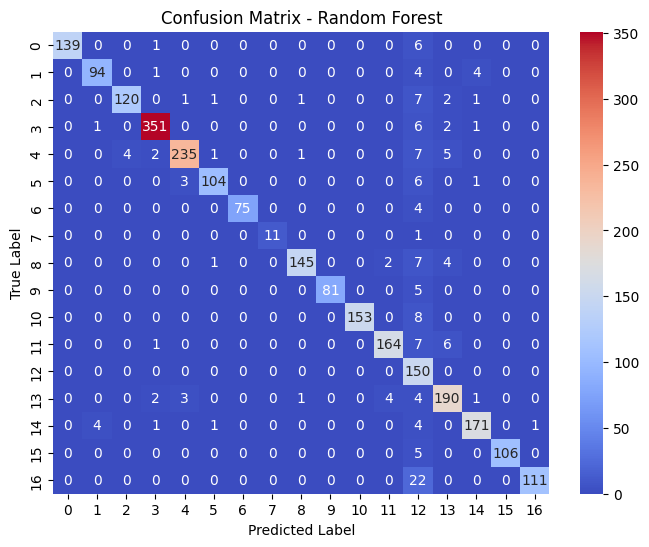



Model: Naive Bayes
Accuracy: 0.9602803738317757
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       146
           1       0.99      0.94      0.97       103
           2       1.00      0.92      0.96       133
           3       0.81      1.00      0.90       361
           4       0.98      0.98      0.98       255
           5       1.00      0.96      0.98       114
           6       1.00      0.95      0.97        79
           7       1.00      0.75      0.86        12
           8       1.00      0.94      0.97       159
           9       1.00      0.95      0.98        86
          10       1.00      0.99      1.00       161
          11       0.99      0.96      0.97       178
          12       1.00      0.97      0.98       150
          13       0.97      0.97      0.97       205
          14       0.98      0.98      0.98       182
          15       1.00      0.97      0.99       111
        

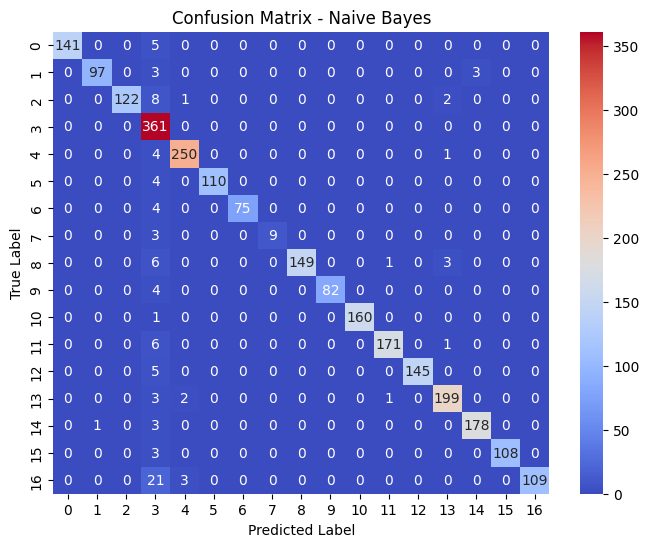

In [59]:
# Model Training
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{classification_report_str}')
    
    
    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    print('\n' + '='*50 + '\n')

In [60]:
def predict(text):
    lang = model.predict(tfidf_vectorizer.transform([text]))
    language = encoder.inverse_transform(lang)[0]
    print('The Language is in', language)

In [61]:
# English
predict("LANGUAGE DETECTION MODEL CHECK")
# French
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
# Arabic
predict("توففحص نموذج الكشف عن اللغة")
# Spanish
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
